# **Introducción al ejercicio**

Análisis del Costo Promedio de Envío por Tienda
En este ejercicio desarrollamos un análisis comparativo del costo promedio de envío en cada una de las cuatro tiendas de la plataforma Alura Store. Esta métrica es fundamental para evaluar la eficiencia logística y el impacto financiero que representa el envío de productos al cliente final.

A través del uso de Python, pandas y la biblioteca de visualización Altair, se construyó un gráfico circular interactivo que permite:

*   Visualizar de forma proporcional el costo promedio de envío por tienda.
*   Identificar cuál tienda incurre en mayores o menores gastos logísticos.
*   Explorar los datos mediante herramientas interactivas como tooltips, con  detalles de cada segmento.

Este ejercicio forma parte del desafío de análisis de datos de Alura Latam, donde buscamos aplicar habilidades clave como:


*   Cálculo de métricas a partir de datasets reales.
*   Representación visual clara y atractiva de información cuantitativa.
*   Extracción de insights relevantes para la toma de decisiones estratégicas.

La visualización generada es especialmente útil para presentar hallazgos en contextos ejecutivos, ya que condensa múltiples datos en un solo gráfico de alto impacto visual y fácil interpretación

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



<ipython-input-1-451fd1a702b3>:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('RdYlGn')  # Rojo -> Amarillo -> Verde


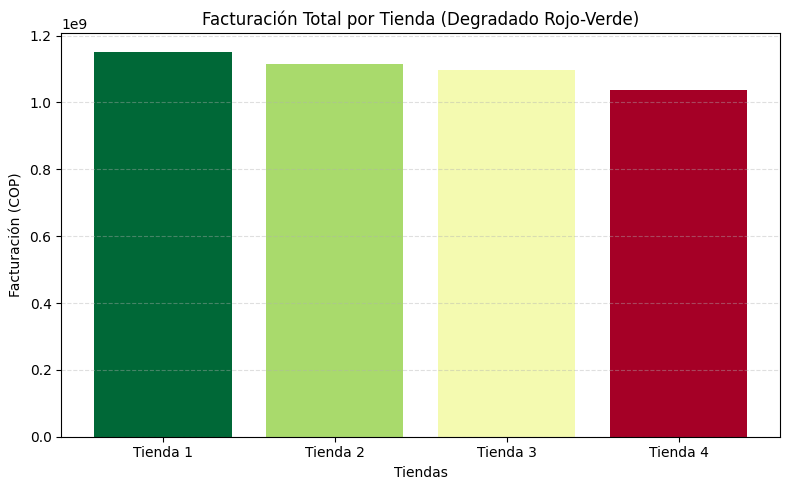

Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700


In [1]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Paso 2: Cargar datos desde GitHub
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Paso 3: Calcular facturación
facturacion_total = {
    'Tienda 1': tienda_1['Precio'].sum(),
    'Tienda 2': tienda_2['Precio'].sum(),
    'Tienda 3': tienda_3['Precio'].sum(),
    'Tienda 4': tienda_4['Precio'].sum()
}

# Paso 4: Preparar colores con degradado
valores = list(facturacion_total.values())
norm = colors.Normalize(vmin=min(valores), vmax=max(valores))
colormap = cm.get_cmap('RdYlGn')  # Rojo -> Amarillo -> Verde
colores = [colormap(norm(valor)) for valor in valores]

# Paso 5: Graficar con colores personalizados
plt.figure(figsize=(8,5))
plt.bar(facturacion_total.keys(), valores, color=colores)
plt.title('Facturación Total por Tienda (Degradado Rojo-Verde)')
plt.xlabel('Tiendas')
plt.ylabel('Facturación (COP)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Paso 6: Mostrar valores
for tienda, valor in facturacion_total.items():
    print(f"{tienda}: ${valor:,.0f}")





# 2. Ventas por categoría

🔢 Ventas por Categoría (unidades):

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


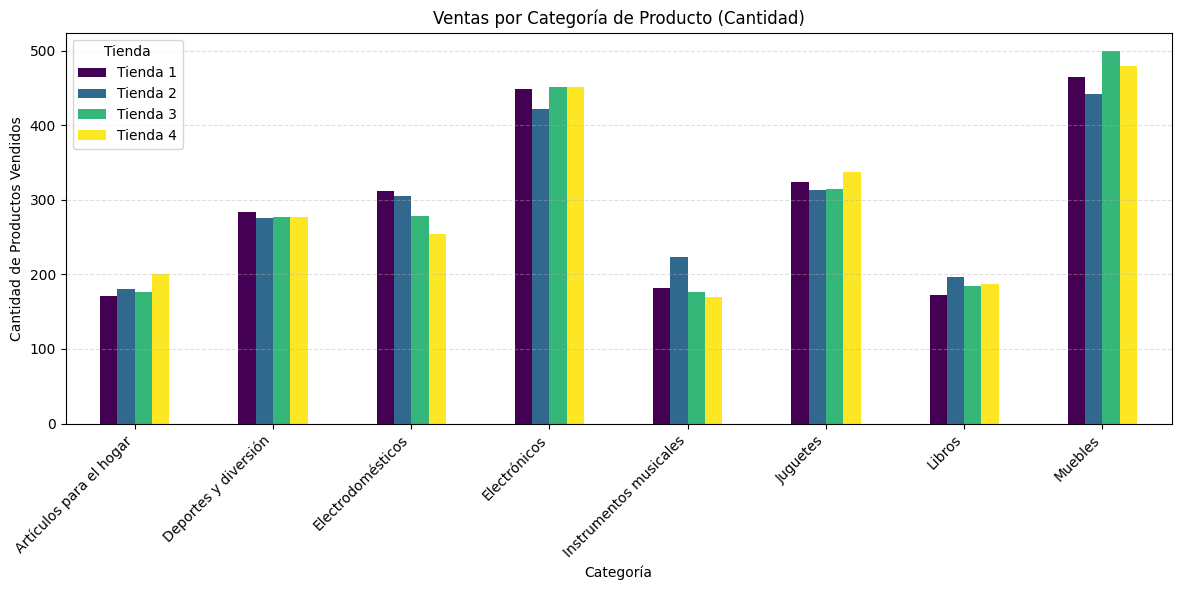

In [ ]:
# Paso 1: Importar pandas y matplotlib si no están importados
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Cargar los datos desde las URLs (si no se ha hecho antes)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Paso 3: Contar ventas por categoría en cada tienda
cat_1 = tienda_1['Categoría del Producto'].value_counts()
cat_2 = tienda_2['Categoría del Producto'].value_counts()
cat_3 = tienda_3['Categoría del Producto'].value_counts()
cat_4 = tienda_4['Categoría del Producto'].value_counts()

# Paso 4: Unificar en un DataFrame
df_categorias = pd.DataFrame({
    'Tienda 1': cat_1,
    'Tienda 2': cat_2,
    'Tienda 3': cat_3,
    'Tienda 4': cat_4
}).fillna(0).astype(int)

# Paso 5: Mostrar la tabla
print("🔢 Ventas por Categoría (unidades):\n")
print(df_categorias)

# Paso 6: Graficar ventas por categoría por tienda
df_categorias.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Ventas por Categoría de Producto (Cantidad)')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend(title='Tienda')
plt.show()


# 3. Calificación promedio de la tienda


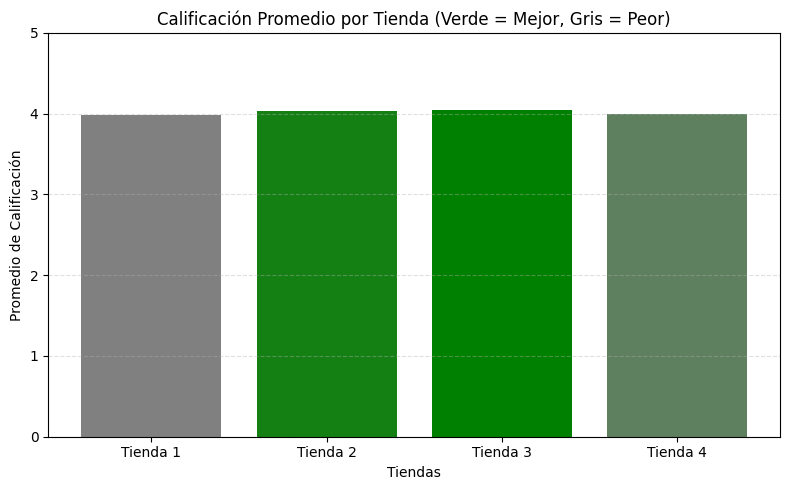

⭐ Promedio de calificación por tienda:

Tienda 1: 3.98 estrellas
Tienda 2: 4.04 estrellas
Tienda 3: 4.05 estrellas
Tienda 4: 4.00 estrellas


In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# Paso 2: Cargar datos desde las URLs (si aún no están cargados)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Paso 3: Calcular promedio de calificación
calificaciones = {
    'Tienda 1': tienda_1['Calificación'].mean(),
    'Tienda 2': tienda_2['Calificación'].mean(),
    'Tienda 3': tienda_3['Calificación'].mean(),
    'Tienda 4': tienda_4['Calificación'].mean()
}

# Paso 4: Configurar degradado personalizado de verde (mejor) a gris (peor)
valores = list(calificaciones.values())
norm = mcolors.Normalize(vmin=min(valores), vmax=max(valores))
colormap = mcolors.LinearSegmentedColormap.from_list("verde_a_gris", ["gray", "green"])
colores = [colormap(norm(v)) for v in valores]

# Paso 5: Graficar
plt.figure(figsize=(8,5))
plt.bar(calificaciones.keys(), valores, color=colores)
plt.title('Calificación Promedio por Tienda (Verde = Mejor, Gris = Peor)')
plt.xlabel('Tiendas')
plt.ylabel('Promedio de Calificación')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Paso 6: Mostrar valores exactos
print("⭐ Promedio de calificación por tienda:\n")
for tienda, promedio in calificaciones.items():
    print(f"{tienda}: {promedio:.2f} estrellas")



# 4. Productos más y menos vendidos

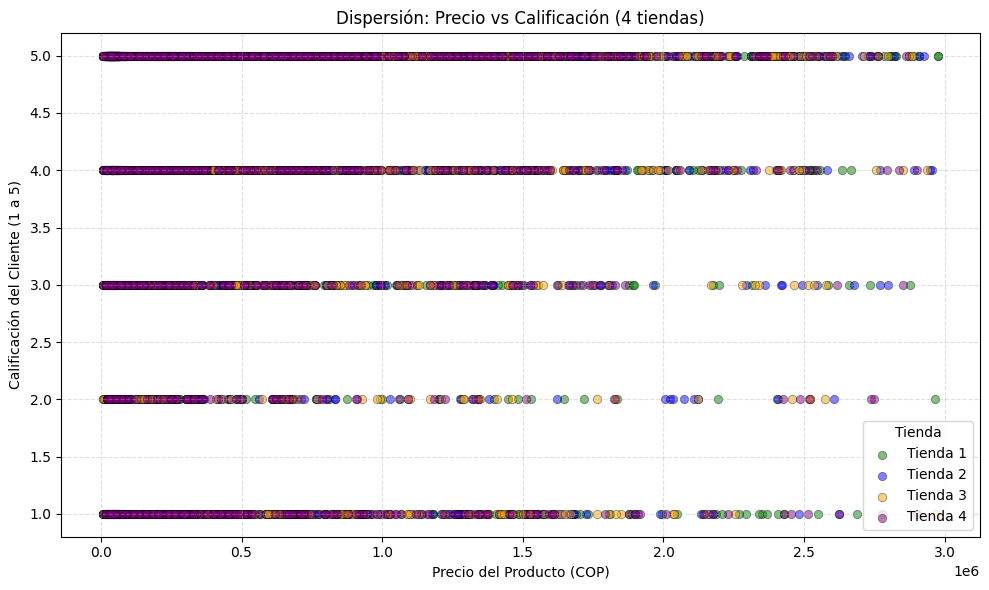

In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Cargar los datos de las 4 tiendas desde GitHub
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Paso 3: Añadir columna para identificar la tienda en cada DataFrame
tienda_1['Tienda'] = 'Tienda 1'
tienda_2['Tienda'] = 'Tienda 2'
tienda_3['Tienda'] = 'Tienda 3'
tienda_4['Tienda'] = 'Tienda 4'

# Paso 4: Unir los DataFrames en uno solo
df_tiendas = pd.concat([tienda_1, tienda_2, tienda_3, tienda_4], ignore_index=True)

# Paso 5: Crear gráfico de dispersión
plt.figure(figsize=(10,6))

colores = {
    'Tienda 1': 'green',
    'Tienda 2': 'blue',
    'Tienda 3': 'orange',
    'Tienda 4': 'purple'
}

for tienda, color in colores.items():
    datos = df_tiendas[df_tiendas['Tienda'] == tienda]
    plt.scatter(
        datos['Precio'],
        datos['Calificación'],
        alpha=0.5,
        label=tienda,
        color=color,
        edgecolors='k',
        linewidths=0.5
    )

# Paso 6: Personalizar el gráfico
plt.title('Dispersión: Precio vs Calificación (4 tiendas)')
plt.xlabel('Precio del Producto (COP)')
plt.ylabel('Calificación del Cliente (1 a 5)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()



# 5. Envío promedio por tienda

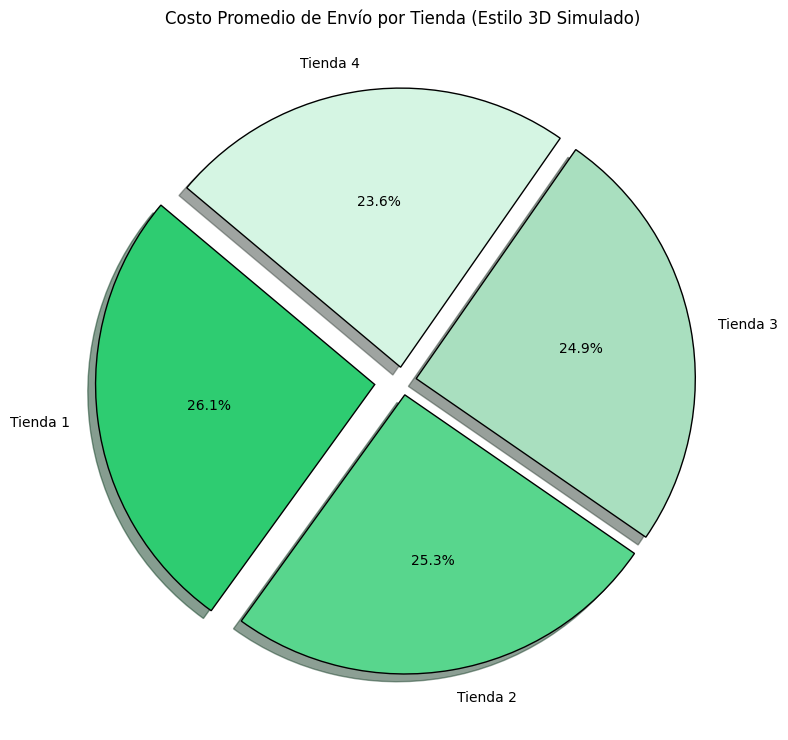

In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Paso 2: Cargar datos desde GitHub
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Paso 3: Calcular envío promedio por tienda
envio_promedio = {
    'Tienda 1': tienda_1['Costo de envío'].mean(),
    'Tienda 2': tienda_2['Costo de envío'].mean(),
    'Tienda 3': tienda_3['Costo de envío'].mean(),
    'Tienda 4': tienda_4['Costo de envío'].mean()
}

# Paso 4: Configurar gráfico Pie estilo 3D (con sombra y explosión)
explode = [0.1, 0.05, 0.05, 0.05]  # resalta Tienda 1
colors = ['#2ECC71', '#58D68D', '#A9DFBF', '#D5F5E3']

plt.figure(figsize=(8, 8))
plt.pie(envio_promedio.values(),
        labels=envio_promedio.keys(),
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        explode=explode,
        colors=colors,
        wedgeprops={'edgecolor': 'black'})

plt.title('Costo Promedio de Envío por Tienda (Estilo 3D Simulado)')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import altair as alt

# Cargar datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url1)
tienda_2 = pd.read_csv(url2)
tienda_3 = pd.read_csv(url3)
tienda_4 = pd.read_csv(url4)

# Calcular costo promedio de envío
envio_promedio = {
    'Tienda 1': tienda_1['Costo de envío'].mean(),
    'Tienda 2': tienda_2['Costo de envío'].mean(),
    'Tienda 3': tienda_3['Costo de envío'].mean(),
    'Tienda 4': tienda_4['Costo de envío'].mean()
}

df = pd.DataFrame(list(envio_promedio.items()), columns=['Tienda', 'Costo Promedio'])

# Agregar columna de porcentaje
df['Porcentaje'] = df['Costo Promedio'] / df['Costo Promedio'].sum()

# Crear gráfico circular
chart = alt.Chart(df).mark_arc(innerRadius=50).encode(
    theta=alt.Theta(field="Porcentaje", type="quantitative"),
    color=alt.Color(field="Tienda", type="nominal", scale=alt.Scale(scheme="greens")),
    tooltip=[
        alt.Tooltip("Tienda:N"),
        alt.Tooltip("Costo Promedio:Q", format=",.0f"),
        alt.Tooltip("Porcentaje:Q", format=".1%")
    ]
).properties(
    width=400,
    height=400,
    title="Costo Promedio de Envío por Tienda (Altair Pie Chart)"
)

chart


alt.Chart(...)